In [60]:
from glob import glob
import pandas as pd
import json
from sklearn.metrics import confusion_matrix

# Auswertung der generierten Daten

In [2]:
files = glob("../feedback/*.json")

In [3]:
files

['../feedback/Marcel.json']

In [14]:
feedback = []

for file in files:
    with open(file) as f:
        feedback.extend(json.load(f))

In [23]:
feedback_data = []

for game_id, f in enumerate(feedback):
    for question_id, result in enumerate(f["gameResults"]):
        d = {col: val for col, val in f.items() if col != "gameResults"}
        d["game_id"] = game_id
        d["question_pos"] = question_id
        for col, value in result.items():
            d[col] = value
        feedback_data.append(d)

In [27]:
feedback_data = pd.DataFrame(feedback_data)

# Alle E-Mail-Adressen mit Namen auslesen

In [32]:
feedback_data[["name", "email"]].drop_duplicates()

,name,email
0,Marcel,marcel
10,Marcel2,
20,Marcel3,
30,Marcel_just_clicking_first_answer,
40,Marcel_just_follow_AI,
50,Marcel_4,


# Auswertung

## Geschwindigkeit insgesamt mit und ohne KI

In [ ]:
feedback_data.drop_duplicates("game_id").groupby("aiMode")["totalTime"].agg(
    ["mean", "median", "min", "max"]
)

,mean,median,min,max
aiMode,,,,
False,60.025,71.1,14.1,83.8
True,30.500,30.5,17.1,43.9


## Geschwindigkeit pro Frage mit und ohne KI

In [38]:
feedback_data.groupby("aiMode")["responseTime"].agg(["mean", "median", "min", "max"])

,mean,median,min,max
aiMode,,,,
False,5.000875,4.9020,0.060,18.544
True,2.052150,1.3015,0.578,10.581


# Anzahl der korrekten Antworten mit und ohne KI

In [ ]:
feedback_data.drop_duplicates("game_id").groupby("aiMode")["correct"].agg(
    ["mean", "median", "min", "max"]
)

,mean,median,min,max
aiMode,,,,
False,7.0,8.0,2,10
True,10.0,10.0,10,10


## Werden Teilnehmende mit der Zeit schneller? (KI vs. ohne KI)

<Axes: title={'center': 'Durchschn. Antwortzeit pro Frage an Position (mit KI)'}, xlabel='Frageposition', ylabel='Antwortzeit in Sekunden'>

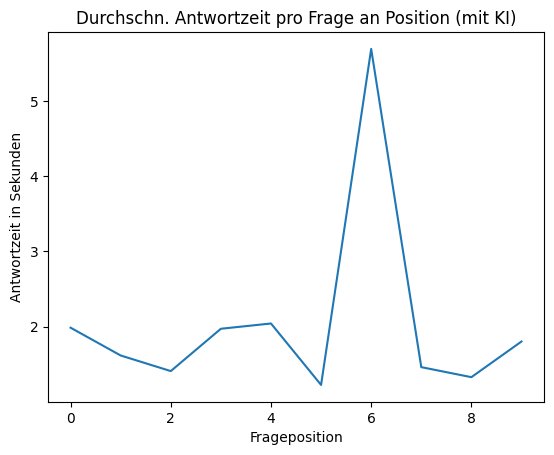

In [ ]:
feedback_data[feedback_data["aiMode"]].groupby("question_pos")[
    "responseTime"
].mean().plot(
    title="Durchschn. Antwortzeit pro Frage an Position (mit KI)",
    xlabel="Frageposition",
    ylabel="Antwortzeit in Sekunden",
)

<Axes: title={'center': 'Durchschn. Antwortzeit pro Frage an Position (ohne KI)'}, xlabel='Frageposition', ylabel='Antwortzeit in Sekunden'>

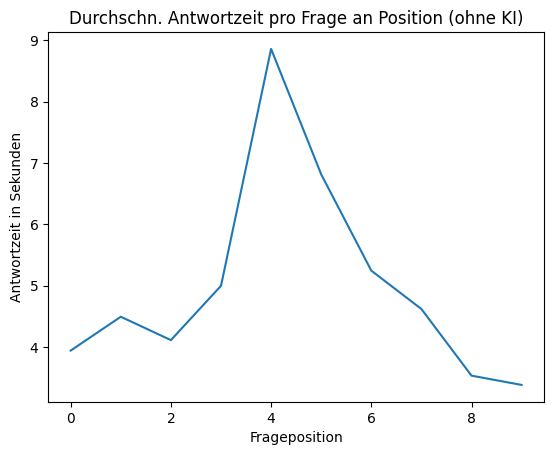

In [ ]:
feedback_data[~feedback_data["aiMode"]].groupby("question_pos")[
    "responseTime"
].mean().plot(
    title="Durchschn. Antwortzeit pro Frage an Position (ohne KI)",
    xlabel="Frageposition",
    ylabel="Antwortzeit in Sekunden",
)

# Welche Kategorie wird wie oft getippt?

In [ ]:
possible_depts = [
    "Finanzabteilung",
    "Rechtsabteilung",
    "Personalabteilung",
    "Leitungsebene",
    "Kundenservice",
]

In [ ]:
# Assuming feedback_data is already defined
incorrect_feedback = feedback_data[["correctDept", "playerChoice"]]

conf_matrix = confusion_matrix(
    incorrect_feedback["correctDept"], incorrect_feedback["playerChoice"]
)

conf_matrix_df = pd.DataFrame(conf_matrix, index=possible_depts, columns=possible_depts)

conf_matrix_df

,Finanzabteilung,Rechtsabteilung,Personalabteilung,Leitungsebene,Kundenservice
Finanzabteilung,16,0,0,3,1
Rechtsabteilung,0,3,1,1,1
Personalabteilung,0,0,6,3,0
Leitungsebene,0,0,0,10,0
Kundenservice,0,0,0,2,13
